<h1 align = "center">Data collection and transmission. </h1>

## Authentication 

In [17]:
import tweepy as tw
import pandas as pd
from tqdm import tqdm

In [3]:
# Authentification information
consumer_key = '****************************'
consumer_secret = '****************************'
access_token = '****************************'
access_secret = '****************************'

In [5]:
# 1. Create an OAuthHandler instance into which you will pass your consumer key and secret
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
# 2. Set up your access token so you do not need to re-fetch it each time you make a request
api = tw.API(auth)

## Collecting Data   
We will collect data from tweeters using the following hashtags   
We collect data through the following process 
retrieve tweets from the tweeter (only 100 tweets can be retrieved at a time) 
store them in a csv file.
Get 100 new tweets and concatenate them with the old ones stored in the csv file. 
Repeat these steps until we get the amount of data we want.

In [ ]:
#CAN2021
#AFCON2021
#TotalEnergiesAFCON2021
#TeamSenegal 
#TeamCameroon
#TeamEgypt
#TeamMarocco
#TeamTunisia

In [411]:
search_words = "#AFCON2021"
# Collect tweets
tweets = tw.Cursor(api.search_tweets,
              q=search_words,
              lang="en").items(100)

In [412]:
tweets_copy = []
for tweet in tqdm(tweets):
     tweets_copy.append(tweet)


0it [00:00, ?it/s]
1it [00:00,  1.98it/s]
16it [00:01,  2.75it/s]
31it [00:01,  3.78it/s]
46it [00:02,  5.12it/s]
61it [00:02,  6.87it/s]
76it [00:02,  9.00it/s]
100it [00:03, 29.00it/s][A


In [414]:
tweets_df = pd.DataFrame()
for tweet in tweets_copy:
    hashtags = []
    try:
        for hashtag in tweet.entities["hashtags"]:
            hashtags.append(hashtag["text"])
        text = api.get_status(id=tweet.id, tweet_mode='extended').full_text
    except:
        pass
    tweets_df = tweets_df.append(pd.DataFrame({'user_name': tweet.user.name, 
                                               'user_location': tweet.user.location,\
                                               'user_description': tweet.user.description,
                                               'user_created': tweet.user.created_at,
                                               'user_followers': tweet.user.followers_count,
                                               'user_friends': tweet.user.friends_count,
                                               'user_favourites': tweet.user.favourites_count,
                                               'user_verified': tweet.user.verified,
                                               'date': tweet.created_at,
                                               'text': text, 
                                               'hashtags': [hashtags if hashtags else None],
                                               'source': tweet.source,
                                               'is_retweet': tweet.retweeted
                                              }, index=[0]))

In [415]:
tweets_df

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,Tetteh Frederick Destiny,"Sekondi Takoradi, Ghana",Humble.. Gunner..,2020-05-30 13:45:17+00:00,193,673,42127,False,2022-02-01 19:20:24+00:00,RT @addojunr: 🗣️Aliou Cisse\n\n“We needed to g...,[AFCON2021],Twitter for Android,False
0,Chukwufemi,Nigeria,I ❤️ 🇳🇬.. That Football Agent (+ @ipsofootball...,2011-01-13 19:33:43+00:00,1420,1978,42232,False,2022-02-01 19:20:22+00:00,RT @chrisonahoff: Getting ready for the semi-f...,None,Twitter for iPhone,False
0,Bulienwa,Nigeria,"Barca fan, love seasonal movies and am the nov...",2016-10-10 11:51:15+00:00,1436,1773,557873,False,2022-02-01 19:20:22+00:00,"RT @EdmundOris: February 2nd, 2022\n\n#AFCON20...","[AFCON2021, OurHomeOurFootball]",Twitter for Android,False
0,hernandez,Kumasi,,2021-03-09 08:10:12+00:00,20,354,3210,False,2022-02-01 19:20:06+00:00,RT @SaddickAdams: Ghana ranked 19th out of the...,[AFCON2021],Twitter for Android,False
0,Wicked Boy Mufasa🤴🇬🇭,"Kumasi, Ghana",•Psalm 23 •,2019-11-14 07:01:00+00:00,5997,6343,115134,False,2022-02-01 19:19:53+00:00,Notable Events in February:\n•#AFCON2021 \n•#F...,"[AFCON2021, FA, UCL]",Twitter for iPhone,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,Ayman Maaytouch,,,2022-01-14 21:52:36+00:00,0,13,83,False,2022-02-01 18:59:23+00:00,RT @CAF_Online: #TeamEgypt are through to the ...,"[TeamEgypt, TotalEnergiesAFCON2021, TeamCotedI...",Twitter for Android,False
0,France Afrique,France :,Best tweets from #FranceAfrique #Nigéria #Sout...,2017-04-09 23:12:06+00:00,4606,3219,577151,False,2022-02-01 18:59:21+00:00,Your daily news with @FranceAfrik\n#FranceAfri...,[FranceAfrique],Twitter Web App,False
0,Ayman Maaytouch,,,2022-01-14 21:52:36+00:00,0,13,83,False,2022-02-01 18:59:17+00:00,RT @arryadiatv: Mabrouk 🇲🇦❤️\n\nNext game for ...,"[TeamMorocco, TeamCotedIvoire, TeamEgypt, AFCO...",Twitter for Android,False
0,mozz,"Kampala, Uganda",,2019-01-26 08:45:49+00:00,3,18,58,False,2022-02-01 18:58:42+00:00,The young player is still promising to play to...,None,Twitter for Android,False


In [416]:
old_can_df = pd.read_csv("can_data.csv")

In [417]:
can_data = pd.concat([old_can_df, tweets_df], axis=0)

In [418]:
can_data.drop_duplicates(subset = ["user_name", "date", "text"], inplace=True)

In [419]:
len(can_data)

1845

In [420]:
can_data.to_csv("can_data.csv", index=False)

## Data cleaning


In [463]:
data = pd.read_csv("can_data.csv")

In [524]:
list_of_twwets = []
for i in range(data.shape[0]):
    selected_info = [data["user_name"][i],data["text"][i],data["hashtags"][i],data["date"][i].split()[0]] 
    
    list_of_twwets.append(selected_info)


In [519]:
def delete_hashtags(text):
    list_of_good_words = []
    list_of_words = text.split()
    for word in list_of_words :
        if not word.startswith("#"):
            list_of_good_words.append(word)
    correct_text = ' '.join(list_of_good_words)
    return correct_text          

In [496]:
def delete_mentions(text):
    list_of_good_words = []
    list_of_words = text.split()
    for word in list_of_words :
        if not word.startswith("@"):
            list_of_good_words.append(word)
    correct_text = ' '.join(list_of_good_words)
    return correct_text 

In [476]:
def delete_links(text):
    list_of_good_words = []
    list_of_words = text.split()
    for word in list_of_words :
        if not word.startswith("https://"):
            list_of_good_words.append(word)
    correct_text = ' '.join(list_of_good_words)
    return correct_text

In [482]:
from spacy.lang.en.stop_words import STOP_WORDS as stopwords
def delete_stop_words(text):
    list_of_good_words = []
    list_of_words = text.split()
    for word in list_of_words :
        if not word.lower() in stopwords:
            list_of_good_words.append(word)
    correct_text = ' '.join(list_of_good_words)
    return correct_text

In [488]:
def delete_non_alnum_words(text) :
    words = []
    for word in text.split():
        s = ''.join(c for c in word if c.isalnum())
        words.append(s)
    return ' '.join(words)

In [630]:
original_text = list_of_twwets[70][1]
print("Original text : ", original_text)
print("---------------------------")
hashtags_deleted = delete_hashtags(original_text)
print("Without hashtags : ", hashtags_deleted)
print("---------------------------")
mention_deleted = delete_mentions(hashtags_deleted)
print("Without mentions : ", mention_deleted)
print("---------------------------")
links_deleted = delete_links(mention_deleted)
print("Without links : ", links_deleted)
print("---------------------------")
stop_words_deleted = delete_stop_words(links_deleted)
print("Without Stop words : ", stop_words_deleted)
print("---------------------------")
carecters_deleted = delete_non_alnum_words(stop_words_deleted)
print("Without non alpha numeric carecters : ", carecters_deleted)
print("---------------------------")

Original text :  So this love story wouna start with Egypt 🇪🇬, how e go pass next week? #TeamEgypt #TeamCameroon #AFCON2022 #TotalEnergiesAFCON2021 #CAN2021 #Fecafoot
---------------------------
Without hashtags :  So this love story wouna start with Egypt 🇪🇬, how e go pass next week?
---------------------------
Without mentions :  So this love story wouna start with Egypt 🇪🇬, how e go pass next week?
---------------------------
Without links :  So this love story wouna start with Egypt 🇪🇬, how e go pass next week?
---------------------------
Without Stop words :  love story wouna start Egypt 🇪🇬, e pass week?
---------------------------
Without non alpha numeric carecters :  love story wouna start Egypt  e pass week
---------------------------


In [504]:
def clean_text(text):
    return delete_non_alnum_words(delete_stop_words(delete_links(delete_mentions(delete_hashtags(text)))))

In [505]:
clean_text(list_of_twwets[50][1])

'Salah Hakimi match '

In [520]:
# cleaning th whol data 
for i in range(len(list_of_twwets)) :
    list_of_twwets[i][1] = clean_text(list_of_twwets[i][1])

In [545]:
list_of_twwets[50][2]

"['Salah', 'Hakimi', 'Egypt', 'Morocco', 'Liverpool', 'PSG', 'ParisSaintGermain', 'CAN2021']"

In [525]:
new_data = pd.DataFrame(list_of_twwets, columns =['Username', 'Text', 'Hashtags', 'Date'])

In [526]:
new_data.head()

,Username,Text,Hashtags,Date
0,Queen Hawa 👸🏽👸🏽,Arbitrage CAN bi 🚮🚮🚮 #CAN2021,['CAN2021'],2022-01-25
1,Makhtar Diop,Footprints of sports events in search engines....,"['CAN2021', 'AFCON2021', 'AFCON2022', 'Senegal']",2022-01-31
2,RAB'z ®,Shaolin Soccer #UltimateFighting #CAN2021 #Mar...,"['UltimateFighting', 'CAN2021', 'MarocEgypte']",2022-01-31
3,🇹🇳 Sedki zn ( FCB ❤ ),Do you remember what happened in #Euro2004 ! T...,"['Euro2004', 'Greece', 'Portugal']",2022-01-31
4,#AFCON2021🌍🏆,🗣Sikazwe- “I was very close to coming back to ...,NaN,2022-01-31


## Visualization

We will do two kinds of visualisation   
1) Visualisation of the topic the most dsicussed the last days   
2) Visualisation of trend during the last days 


### Visualisazation of topics

In [511]:
#Creating text containing all tweets we have collected 
text = ''
for tweet_text in new_data["Text"]:
    text = text + " " + tweet_text

In [512]:
text

' Arbitrage bi  Footprints sports events search engines example Senegal Shaolin Soccer remember happened  opening final game thing Sikazwe I close coming Zambia casket closePeople sorts negative comments handled game Let be Let comments Its about game HAMADOU HAIJO thats Egyptian King  leadership sportsmanship model all Mabrouk ya Masr     Jubilant scenes Dakar Senegal beat Equatorial Guinea book spot semifinals ongoing Cameroon TeamSenegal North African Derby world football Congratulation Egypt wining yesterday  Egypt b3 expecting 7 team players positive amp PSG center Abdou Diallo encouraging teammates focus eyes fixed ultimate prize Equatorial Guinea game  CAN2021 king Egyptian king Cameroon land opportunities No its suburbs Birnin Zana Wakanda its Stade annexe de Bepanda I DLA Fruitful Week  Classy display sportsmanship Achraf Hakimi  Mo Salah  CAN2021 terrible referee Egypt Morocco game disgrace won ashamed African referee Wakeup stop making look terrible like dont good referee Af

In [517]:
# In order to visualise words we will use lybraries :  wordcloud and matplotlib
from wordcloud import WordCloud
import matplotlib.pyplot as plt

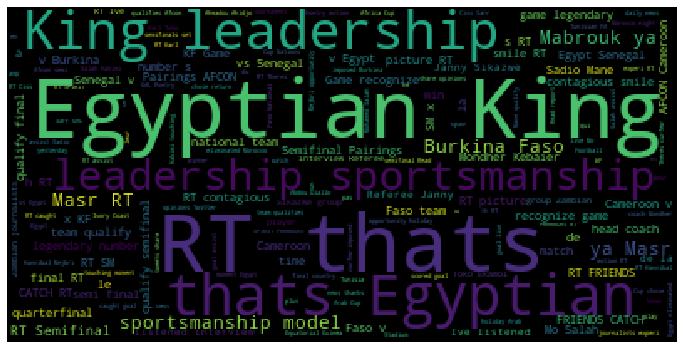

In [516]:
wordcloud = WordCloud().generate(text)
plt.figure(figsize = (12,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

We can see that in recent days, one of the most used words in the context of the CAN is "Egyptian king", which is the nickname of Mohamed Salah.

### Visualisazation of trends

#### 1) The most used trens


In [565]:
def list_of_hashtag_from_string(text):
    words = []
    for word in text.split():
        words.append(delete_non_alnum_words(word))
    return words
list_of_hashtag_from_string(new_data["Hashtags"][0])

['CAN2021']

In [576]:
for string_hashtag in new_data["Hashtags"].dropna():
    if string_hashtag:
        print(string_hashtag)

['CAN2021']
['CAN2021', 'AFCON2021', 'AFCON2022', 'Senegal']
['UltimateFighting', 'CAN2021', 'MarocEgypte']
['Euro2004', 'Greece', 'Portugal']
['CAN2021', 'AFCON2021', 'CANTotalEnergies2021']
['COVID19', 'CAN2021', 'AFCON2021']
['TeamSenegal']
['Egypt', 'LiverpoolFC', 'CAN2021']
['MotivationMonday', 'cameroon', 'AFCON2021', 'CAN2021', 'India']
['TeamEgypt', 'TeamMorocco', 'AFCON2021', 'CAN2021']
['TotalEnergiesCAN2021', 'Yaounde', 'Cameroon']
['Yaounde', 'Cameroon', 'Cameroun']
['Nigeria', 'Dancer', 'Trending', 'love', 'AFCON2021', 'CAN2021', 'BBNaija', 'Saweetie', 'Greenwood']
['CelebrateAfrica', 'Cameroun', 'Cameroon']
['CelebrateAfrica', 'Cameroun', 'Cameroon']
['CAN2021']
['TeamSenegal', 'CAN2021']
['CAN2021', 'AFCON2021', 'TeamCameroon']
['CAN2021', 'EGYMAR']
['Egypte', 'Maroc', 'CANTotalEnergies2021', 'CAN2021', 'AFCON2021', 'EGYMAR', 'CAN2022']
['AFCON2021', 'CAN2021']
['CANMNT', 'CAN2021']
['TotalEnergiesAFCON2021', 'AFCON2021', 'CAN2021']
['CAN2021', 'Goaldo']
['CAN2021', 'AFC

In [577]:
##### counting the number of reputition of each trend
dict_of_trends = {}
for string_hashtag in new_data["Hashtags"].dropna():
    if string_hashtag != None :
        list_of_hashtags = list_of_hashtag_from_string(string_hashtag)
        for hashtag in list_of_hashtags :
            if hashtag in dict_of_trends.keys():
                dict_of_trends[hashtag] +=1
            else :
                dict_of_trends[hashtag] = 1
    

In [586]:
lst = list(zip(list(dict_of_trends.keys()), list(dict_of_trends.values())))
df_trends = pd.DataFrame(lst, columns =['trend', 'count'])

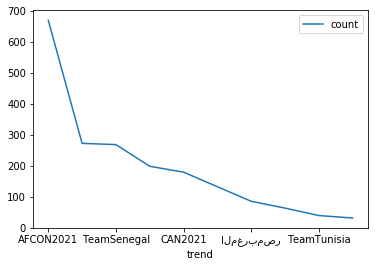

In [605]:
sorted_df = df_trends.sort_values("count", ascending=False)[:10]
sorted_df.plot(x= "trend", y= "count")

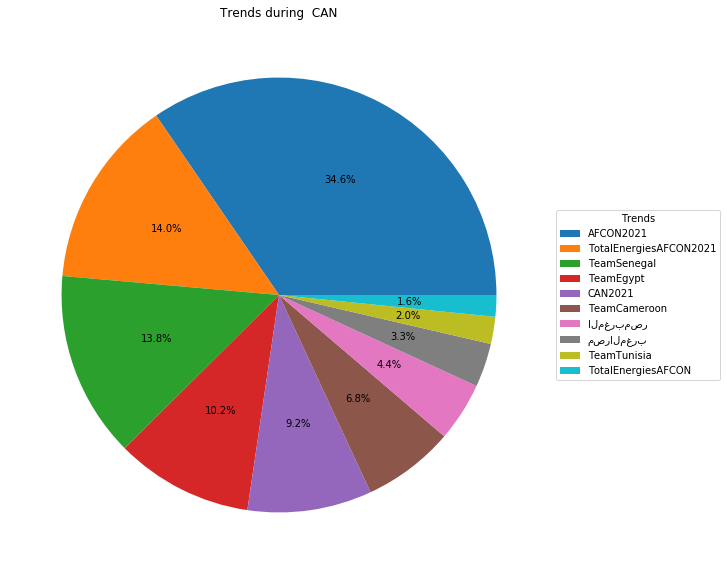

In [629]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))
wdg = ax.pie(sorted_df["count"], autopct='%.1f%%')
ax.legend(sorted_df["trend"],
          title="Trends",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
ax.set_title('Trends during  CAN')
plt.show()